# Introduction
This tutorial will provide an in-depth exploratory analysis of the 2014-2015 NBA season. By hypothesis testing graphical exploratory analysis, end-of-season awards can be predicted with high accuracy. These awards take into account more than just numbers, which is why the results are always a hot topic for debate in the NBA. Millions of viewers tune in to hear the analysts of ESPN's First Take and FOX's Undisputed debate controversial topics such as end-of-season NBA awards. Take a look at this segment aired on ESPN's First Take during the 2014-2015 NBA season https://www.youtube.com/watch?v=nJ9rWZCPNys.

Our representation of the season statistics should help people interested in knowing who statiscially deserves these awards. Unbiased digging for information is the foundation of our notebook.

Presenting facts with numbers makes for great debate when discussing these disputed topics. In addition, correlations from these statistics can be formed by examining graphical representations of specific sections of data. The conclusions that we draw from this data is inteneded to visualy and logically add to arguments related to end-of-season awards.

## Tutorial Content
In this tutorial, we will display an exploratory analysis in Python.

The data that we will be referencing in this notebook was made available via the link:https://www.kaggle.com/drgilermo/nba-players-stats-20142015. 

There is a .csv file titled players_stats.csv which is the table that is responsible for all data in this notebook. 

To ensure that this data is valid, we can reference http://www.basketball-reference.com/leagues/NBA_2015_totals.html. This information is widely available on the internet; the NBA is a highly popular organization that millions of people across the world watch.

We will cover the following topics in this tutorial:
- [Installing Libraries](#Installing_Libraries)
- [Loading Data and Plotting](#Loading_Data_and_Plotting)
- [Organizing Data by Specific Statistics](#Organizing_Data_by_Specific_Statistics)
- [Example Application: Determining the MVP](#Example_Application:_Determining_the_MVP)
- [Example Application: Determining the Defensive Player of the Year](#Example_Application:_Determining_the_DPOY)
- [Example Applocation: Determining the Rookie of the Year](#Example_Application:_Determining_the_ROTY)
- [Summary and References](#Summary)

<a id='Installing_Libraries'></a>
## Installing Libraries
To view graphs and tables in the notebook, we have to import certain libraries which are listed below. The documentation for these can be researched as needed by users with available online documentation. 

In [879]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<a id='Loading_Data_and_Plotting'></a>
## Loading Data and Plotting
Once the necessary libraries are imported, it is time to retrieve the data that we will be using from our online source. 

To start, make sure that the players_stats.csv file from the web is downloaded and stored in this directory if not already. The read_csv method will be called; we will have a view of the entire wealth of information that the source contains sorted by first name.

In [880]:
data = pd.read_csv("players_stats.csv")
data.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,7-Oct-86,University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,14-Jan-85,University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,16-Sep-95,University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,19-Feb-91,Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,3-Jun-86,University of Florida,7,205.0,C,ATL,110.25,26.234384


To determine the average stats per game, we want to divide the total stat by the number of games played. Our original table gives us totals, but when looking at end-of-season awards, the main stats that are taken into consideration are points per game, assists per game, and rebounds per game. 

In our most recent NBA season, Russell Westbrook averaged a triple double. That means he averaged over 10 points, rebouds, and assists per game. Not only did he accomplish this rare showcase of brilliance, but he also led the league in points per game. Our models would have unanimously chosen him as an MVP, yet he is not a sure bet to win the award. Another player, James Harden, who was on a better team is heavily contesting the right to the MVP award. 

For more a interesting reading on the current 2017 NBA most valuable player race, check out http://bleacherreport.com/articles/2703290-metrics-101-whos-the-nba-mvp. Further exploratory analysis of the newly created advanced metrics is being conducted by bleacher report, one of the pioneers in the sports social media. Stats such as the box plus minus or percentage of wins accounted for, are advanced calculations that data scientists have been working on developing to help officals correctly present their end-of-season awards. 

It is important to understand that our model does not account for factors such as team performance or leadership intangibles that cannot be measured. 

In [881]:
avg = pd.DataFrame(data['Name'])
avg['Avg Min'] = data['MIN']/data['Games Played']
avg['Avg Points'] = data['PTS']/data['Games Played']
avg['Avg Assists'] = data['AST']/data['Games Played']
avg['Avg Rebounds'] = data['REB']/data['Games Played']
avg['Avg Steals'] = data['STL']/data['Games Played']
avg['Avg Blocks'] = data['BLK']/data['Games Played']
avg['Avg Turnovers'] = data['TOV']/data['Games Played']
avg['Experience'] = data['Experience']
avg.head()

,Name,Avg Min,Avg Points,Avg Assists,Avg Rebounds,Avg Steals,Avg Blocks,Avg Turnovers,Experience
0,AJ Price,12.461538,5.115385,1.769231,1.230769,0.269231,0.000000,0.538462,5
1,Aaron Brooks,22.987805,11.634146,3.182927,2.024390,0.658537,0.182927,1.914634,6
2,Aaron Gordon,16.957447,5.170213,0.702128,3.595745,0.446809,0.468085,0.808511,R
3,Adreian Payne,23.125000,6.656250,0.937500,5.062500,0.593750,0.281250,1.375000,R
4,Al Horford,30.500000,15.210526,3.210526,7.157895,0.894737,1.289474,1.315789,7


We have reorganized the data from the origianl source to include the pertinent information that will be used to determined who statistically earned the awards. 

<a id='Organizing_Data_by_Specific_Statistics'></a>
## Organizing Data by Specific Statistics
For each stat that an average was taken for, we want to have a seperate two column data frame sorted from highest average to lowest average. These refined tables are visually much less cluttered and will help determine who deserves the hardware.

In [882]:
points = avg.sort_values(['Avg Points'], ascending = [False])
points = points.reset_index()
points = points.drop(['index','Avg Min','Avg Assists','Avg Rebounds','Avg Steals','Avg Blocks','Avg Turnovers','Experience'], axis=1)
points.head() # Prints the top 5 scoring leaders 


,Name,Avg Points
0,Russell Westbrook,28.149254
1,James Harden,27.370370
2,Kevin Durant,25.407407
3,LeBron James,25.260870
4,Anthony Davis,24.352941


In [883]:
assists = avg.sort_values(['Avg Assists'], ascending = [False])
assists = assists.reset_index()
assists = assists.drop(['index','Avg Min','Avg Points','Avg Rebounds','Avg Steals','Avg Blocks','Avg Turnovers','Experience'], axis=1)
assists.head() # Prints the top 5 assist leaders 

,Name,Avg Assists
0,Chris Paul,10.219512
1,John Wall,10.025316
2,Ty Lawson,9.600000
3,Ricky Rubio,8.772727
4,Russell Westbrook,8.567164


In [884]:
rebounds = avg.sort_values(['Avg Rebounds'], ascending = [False])
rebounds = rebounds.reset_index()
rebounds = rebounds.drop(['index','Avg Min','Avg Points','Avg Assists','Avg Steals','Avg Blocks','Avg Turnovers','Experience'], axis=1)
rebounds.head() # Prints the top 5 rebound leaders 

,Name,Avg Rebounds
0,DeAndre Jordan,14.951220
1,Andre Drummond,13.463415
2,DeMarcus Cousins,12.661017
3,Pau Gasol,11.782051
4,Tyson Chandler,11.520000


In [885]:
steals = avg.sort_values(['Avg Steals'], ascending = [False])
steals = steals.reset_index()
steals = steals.drop(['index','Avg Min','Avg Points','Avg Assists','Avg Rebounds','Avg Blocks','Avg Turnovers','Experience'], axis=1)
steals.head() # Prints the top 5 steal leaders 

,Name,Avg Steals
0,Kawhi Leonard,2.312500
1,Russell Westbrook,2.089552
2,Tony Allen,2.047619
3,Stephen Curry,2.037500
4,Chris Paul,1.902439


In [886]:
blocks = avg.sort_values(['Avg Blocks'], ascending = [False])
blocks = blocks.reset_index()
blocks = blocks.drop(['index','Avg Min','Avg Points','Avg Assists','Avg Rebounds','Avg Steals','Avg Turnovers','Experience'], axis=1)
blocks.head() # Prints the top 5 block leaders 

,Name,Avg Blocks
0,Anthony Davis,2.941176
1,Hassan Whiteside,2.562500
2,Serge Ibaka,2.421875
3,Rudy Gobert,2.304878
4,DeAndre Jordan,2.231707


<a id='Example_Application:_Determining_the_MVP'></a>
## Example Application: Determining the MVP
All fourteen of the players who show up in the top five of points per game, rebounds per game, and assists per game are elligible to be considered for the most valuable player. 

Notice that their should be fifteen players, but Russell Westbrook appears in two of the tables. This should benifit his case for the most valuable player award under the specifications used in this notebook. In order to determine statistically who the winner should be imvolves calculating a score that will be asseed to each player based on their rank in each of the three averages listed above. The player who has the lowest rank should be the league's most valuable player. 

When the league determines the winner of the most valuable player award, the officials take into account much more than the three catagories that we are considering.  

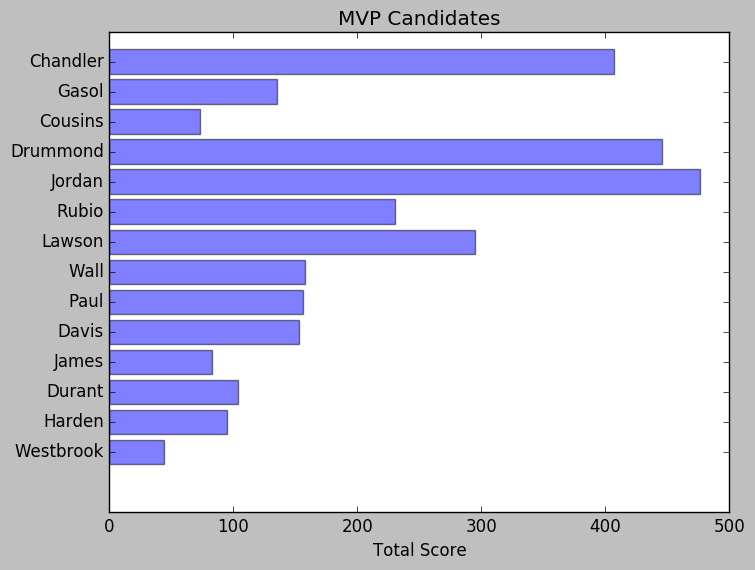

In [887]:
# Get each candidate's ranking in points, assists, and rebounds and add it all up 
c1 = points.Name[points.Name == 'Russell Westbrook'].index.tolist()
c1 = c1 + assists.Name[assists.Name == 'Russell Westbrook'].index.tolist()
c1 = c1 + rebounds.Name[rebounds.Name == 'Russell Westbrook'].index.tolist()

c2 = points.Name[points.Name == 'James Harden'].index.tolist()
c2 = c2 + assists.Name[assists.Name == 'James Harden'].index.tolist()
c2 = c2 + rebounds.Name[rebounds.Name == 'James Harden'].index.tolist()

c3 = points.Name[points.Name == 'Kevin Durant'].index.tolist()
c3 = c3 + assists.Name[assists.Name == 'Kevin Durant'].index.tolist()
c3 = c3 + rebounds.Name[rebounds.Name == 'Kevin Durant'].index.tolist()

c4 = points.Name[points.Name == 'LeBron James'].index.tolist()
c4 = c4 + assists.Name[assists.Name == 'LeBron James'].index.tolist()
c4 = c4 + rebounds.Name[rebounds.Name == 'LeBron James'].index.tolist()

c5 = points.Name[points.Name == 'Anthony Davis'].index.tolist()
c5 = c5 + assists.Name[assists.Name == 'Anthony Davis'].index.tolist()
c5 = c5 + rebounds.Name[rebounds.Name == 'Anthony Davis'].index.tolist()

c6 = points.Name[points.Name == 'Chris Paul'].index.tolist()
c6 = c6 + assists.Name[assists.Name == 'Chris Paul'].index.tolist()
c6 = c6 + rebounds.Name[rebounds.Name == 'Chris Paul'].index.tolist()

c7 = points.Name[points.Name == 'John Wall'].index.tolist()
c7 = c7 + assists.Name[assists.Name == 'John Wall'].index.tolist()
c7 = c7 + rebounds.Name[rebounds.Name == 'John Wall'].index.tolist()

c8 = points.Name[points.Name == 'Ty Lawson'].index.tolist()
c8 = c8 + assists.Name[assists.Name == 'Ty Lawson'].index.tolist()
c8 = c8 + rebounds.Name[rebounds.Name == 'Ty Lawson'].index.tolist()

c9 = points.Name[points.Name == 'Ricky Rubio'].index.tolist()
c9 = c9 + assists.Name[assists.Name == 'Ricky Rubio'].index.tolist()
c9 = c9 + rebounds.Name[rebounds.Name == 'Ricky Rubio'].index.tolist()

c10 = points.Name[points.Name == 'DeAndre Jordan'].index.tolist()
c10 = c10 + assists.Name[assists.Name == 'DeAndre Jordan'].index.tolist()
c10 = c10 + rebounds.Name[rebounds.Name == 'DeAndre Jordan'].index.tolist()

c11 = points.Name[points.Name == 'Andre Drummond'].index.tolist()
c11 = c11 + assists.Name[assists.Name == 'Andre Drummond'].index.tolist()
c11 = c11 + rebounds.Name[rebounds.Name == 'Andre Drummond'].index.tolist()

c12 = points.Name[points.Name == 'DeMarcus Cousins'].index.tolist()
c12 = c12 + assists.Name[assists.Name == 'DeMarcus Cousins'].index.tolist()
c12 = c12 + rebounds.Name[rebounds.Name == 'DeMarcus Cousins'].index.tolist()

c13 = points.Name[points.Name == 'Pau Gasol'].index.tolist()
c13 = c13 + assists.Name[assists.Name == 'Pau Gasol'].index.tolist()
c13 = c13 + rebounds.Name[rebounds.Name == 'Pau Gasol'].index.tolist()

c14 = points.Name[points.Name == 'Tyson Chandler'].index.tolist()
c14 = c14 + assists.Name[assists.Name == 'Tyson Chandler'].index.tolist()
c14 = c14 + rebounds.Name[rebounds.Name == 'Tyson Chandler'].index.tolist()

totalScore = []
for i in range(14):
    totalScore.append(0)
for i in range(0, 3):
    totalScore[0] = totalScore[0] + c1[i]
    totalScore[1] = totalScore[1] + c2[i]
    totalScore[2] = totalScore[2] + c3[i]
    totalScore[3] = totalScore[3] + c4[i]
    totalScore[4] = totalScore[4] + c5[i]
    totalScore[5] = totalScore[5] + c6[i]
    totalScore[6] = totalScore[6] + c7[i]
    totalScore[7] = totalScore[7] + c8[i]
    totalScore[8] = totalScore[8] + c9[i]
    totalScore[9] = totalScore[9] + c10[i]
    totalScore[10] = totalScore[10] + c11[i]
    totalScore[11] = totalScore[11] + c12[i]
    totalScore[12] = totalScore[12] + c13[i]
    totalScore[13] = totalScore[13] + c14[i]

# Graph the total score of each candidate. Candidate with the smallest score is the MVP    
players = ('Westbrook', 'Harden', 'Durant', 'James', 'Davis', 'Paul', 'Wall', 'Lawson', 'Rubio', 'Jordan', 'Drummond', 'Cousins', 'Gasol', 'Chandler')
y_pos = np.arange(len(players))
 
plt.barh(y_pos, totalScore, align='center', alpha=0.5)
plt.yticks(y_pos, players)
plt.xlabel('Total Score')
plt.title('MVP Candidates')
 
plt.show()


The bar graph above visually represents the total score that was determined based off of player's rank in points, rebounds, and assists per game. As predicted, Russell Westbrook is the candidate that should recieve the award, and the next closest candidates were DeMarcus Cousins, LeBron James, James Harden, and Kevin Durant. 

The actual winner of the award was Stephen Curry. Our models would not consider Curry as an MVP candidate becasue he was not even in the top five players of the three catagories considered for honorary hardware. Curry's team was the best team in the league, and he was the best player on his team, which is a main argument made in defense of Curry being awarded the MVP. To get a sense of the uncertainty around the deserving winner of the award, checkout some sources http://ftw.usatoday.com/2015/10/james-harden-stephen-curry-mvp-debate. Westbrook was in discussions too http://ftw.usatoday.com/2015/04/russell-westbrook-thunder-mvp-race-usage-rate. 

Without any mention of team performance, this model strictly looks at numbers and logically forms scores to determine the deserving winner. 

<a id='Example_Application:_Determining_the_DPOY'></a>
## Example Application: Determining the Defensive Player of the Year
In determining defensive player of the year, the most commonly examined stats include rebounds, steals, and blocks per game. As with all sports, there are aspects of defense that cannot be measured by stats. Great defenders can cause turnovers and work on positioning to best prevent the other team from scoring. Many times its an attitude or hardworking mentality that seperates the top defensive players from the rest of the league. Since we are looking at awards exclusively by the numbers, this notebook will create a score for each of the fourteen players who show up in the top five of rebounds, steals, or blocks per game. Again there should be fifteen players, but DeAndre Jordan appears in the top five of two of the catagories. Thus, DeAndre Jordan should have a high likelyhood of being the defensive player of the year. 

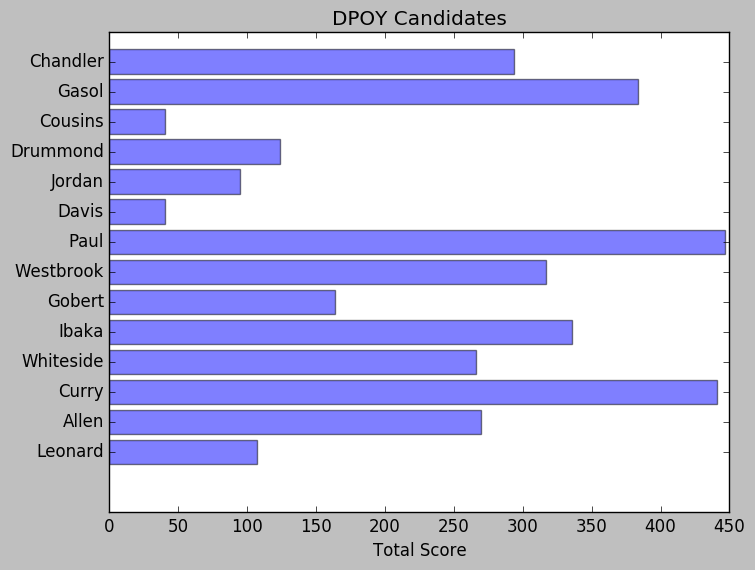

In [888]:
# Get each candidate's ranking in rebounds, steals, and blocks and add it all up 
c1 = rebounds.Name[rebounds.Name == 'Kawhi Leonard'].index.tolist()
c1 = c1 + steals.Name[steals.Name == 'Kawhi Leonard'].index.tolist()
c1 = c1 + blocks.Name[blocks.Name == 'Kawhi Leonard'].index.tolist()

c2 = rebounds.Name[rebounds.Name == 'Tony Allen'].index.tolist()
c2 = c2 + steals.Name[steals.Name == 'Tony Allen'].index.tolist()
c2 = c2 + blocks.Name[blocks.Name == 'Tony Allen'].index.tolist()

c3 = rebounds.Name[rebounds.Name == 'Stephen Curry'].index.tolist()
c3 = c3 + steals.Name[steals.Name == 'Stephen Curry'].index.tolist()
c3 = c3 + blocks.Name[blocks.Name == 'Stephen Curry'].index.tolist()

c4 = rebounds.Name[rebounds.Name == 'Hassan Whiteside'].index.tolist()
c4 = c4 + steals.Name[steals.Name == 'Hassan Whiteside'].index.tolist()
c4 = c4 + blocks.Name[blocks.Name == 'Hassan Whiteside'].index.tolist()

c5 = rebounds.Name[rebounds.Name == 'Serge Ibaka'].index.tolist()
c5 = c5 + steals.Name[steals.Name == 'Serge Ibaka'].index.tolist()
c5 = c5 + blocks.Name[blocks.Name == 'Serge Ibaka'].index.tolist()

c6 = rebounds.Name[rebounds.Name == 'Rudy Gobert'].index.tolist()
c6 = c6 + steals.Name[steals.Name == 'Rudy Gobert'].index.tolist()
c6 = c6 + blocks.Name[blocks.Name == 'Rudy Gobert'].index.tolist()

c7 = rebounds.Name[rebounds.Name == 'Russell Westbrook'].index.tolist()
c7 = c7 + steals.Name[steals.Name == 'Russell Westbrook'].index.tolist()
c7 = c7 + blocks.Name[blocks.Name == 'Russell Westbrook'].index.tolist()

c8 = rebounds.Name[rebounds.Name == 'Chris Paul'].index.tolist()
c8 = c8 + steals.Name[steals.Name == 'Chris Paul'].index.tolist()
c8 = c8 + blocks.Name[blocks.Name == 'Chris Paul'].index.tolist()

c9 = rebounds.Name[rebounds.Name == 'Anthony Davis'].index.tolist()
c9 = c9 + steals.Name[steals.Name == 'Anthony Davis'].index.tolist()
c9 = c9 + blocks.Name[blocks.Name == 'Anthony Davis'].index.tolist()

c10 = rebounds.Name[rebounds.Name == 'DeAndre Jordan'].index.tolist()
c10 = c10 + steals.Name[steals.Name == 'DeAndre Jordan'].index.tolist()
c10 = c10 + blocks.Name[blocks.Name == 'DeAndre Jordan'].index.tolist()

c11 = rebounds.Name[rebounds.Name == 'Andre Drummond'].index.tolist()
c11 = c11 + steals.Name[steals.Name == 'Andre Drummond'].index.tolist()
c11 = c11 + blocks.Name[blocks.Name == 'Andre Drummond'].index.tolist()

c12 = rebounds.Name[rebounds.Name == 'DeMarcus Cousins'].index.tolist()
c12 = c12 + steals.Name[steals.Name == 'DeMarcus Cousins'].index.tolist()
c12 = c12 + blocks.Name[blocks.Name == 'DeMarcus Cousins'].index.tolist()

c13 = rebounds.Name[rebounds.Name == 'Pau Gasol'].index.tolist()
c13 = c13 + steals.Name[steals.Name == 'Pau Gasol'].index.tolist()
c13 = c13 + blocks.Name[blocks.Name == 'Pau Gasol'].index.tolist()

c14 = rebounds.Name[rebounds.Name == 'Tyson Chandler'].index.tolist()
c14 = c14 + steals.Name[steals.Name == 'Tyson Chandler'].index.tolist()
c14 = c14 + blocks.Name[blocks.Name == 'Tyson Chandler'].index.tolist()

totalScore = []
for i in range(14):
    totalScore.append(0)
for i in range(0, 3):
    totalScore[0] = totalScore[0] + c1[i]
    totalScore[1] = totalScore[1] + c2[i]
    totalScore[2] = totalScore[2] + c3[i]
    totalScore[3] = totalScore[3] + c4[i]
    totalScore[4] = totalScore[4] + c5[i]
    totalScore[5] = totalScore[5] + c6[i]
    totalScore[6] = totalScore[6] + c7[i]
    totalScore[7] = totalScore[7] + c8[i]
    totalScore[8] = totalScore[8] + c9[i]
    totalScore[9] = totalScore[9] + c10[i]
    totalScore[10] = totalScore[10] + c11[i]
    totalScore[11] = totalScore[11] + c12[i]
    totalScore[12] = totalScore[12] + c13[i]
    totalScore[13] = totalScore[13] + c14[i]
    
# Graph the total score of each candidate. Candidate with the smallest score is the DPOY    
players = ('Leonard', 'Allen', 'Curry', 'Whiteside', 'Ibaka', 'Gobert', 'Westbrook', 'Paul', 'Davis', 'Jordan', 'Drummond', 'Cousins', 'Gasol', 'Chandler')
y_pos = np.arange(len(players))
 
plt.barh(y_pos, totalScore, align='center', alpha=0.5)
plt.yticks(y_pos, players)
plt.xlabel('Total Score')
plt.title('DPOY Candidates')
 
plt.show()    


The bar graph above visually represents the total score that was determined based off of player's rank in rebounds, steals, and blocks per game. The prediction of DeAndre Jordan was not correct. DeMarcus Cousins and Anthony Davis are tied as the best candidates to win the award. The next closest candidates are DeAndre Jordan, Andre Drummond, and Kawai Leonard.

The actual winner of the award was Kawai Leonard. The official decision is voted on by a panel of officials who take many factors into consideration. Further reading on how Kawai Leonard was selected the winner of this awawrd can be found at http://www.nba.com/2015/news/04/23/kawhi-leonard-2014-15-kia-defensive-player-of-the-year-official-release/ . 

Our models seem to favor big men in the defensive player of the year race. Centers and power forwards are more likely to be pulling down a higher number of rebounds and get a higher number of blocks because they are in more situations to accumulate these stats. They play down low in the paint and contribute to their team by scrapping for rebounds and protecting the rim. Without any mention of team performance, this model strictly looks at numbers and does not take into account on-ball defensive and distruption that players may create as a defensive presence. 

<a id='Example_Application:_Determining_the_ROTY'></a>
## Example Application: Determining the Rookie of the Year
In determining the rookie of the year, the most commonly examined stats are the same as most valuable player. The rookie of the year award can be viewed as the most valuable rookie.

Only players with an R in their experience column are eligible to win this award. First the table should be refined to look only at the rookies and then, smaller sorted tables should be created to represent the top rookies for each statistic. 

As with the MVP analysis this notebook will create a score for each of the twelve players who show up in the top five of points, assists, or rebounds per game. Again there should be fifteen players, but Zach LaVine, Langston Galloway, and Jordan Clarkson all appear in the top five of two of the catagories. Thus, one of these three guys should have a high likelyhood of being the rookie of the year.

In [889]:
# Rookie statistics
rooks = avg[avg.Experience == 'R']
rooks.head()

,Name,Avg Min,Avg Points,Avg Assists,Avg Rebounds,Avg Steals,Avg Blocks,Avg Turnovers,Experience
2,Aaron Gordon,16.957447,5.170213,0.702128,3.595745,0.446809,0.468085,0.808511,R
3,Adreian Payne,23.125000,6.656250,0.937500,5.062500,0.593750,0.281250,1.375000,R
8,Alex Kirk,2.800000,0.800000,0.200000,0.200000,0.000000,0.000000,0.000000,R
18,Andre Dawkins,5.500000,0.750000,0.250000,0.500000,0.000000,0.000000,0.250000,R
27,Andrew Wiggins,36.207317,16.914634,2.073171,4.560976,1.048780,0.609756,2.158537,R


In [890]:
pointsR = rooks.sort_values(['Avg Points'], ascending = [False])
pointsR = pointsR.reset_index()
pointsR = pointsR.drop(['index','Avg Min','Avg Assists','Avg Rebounds','Avg Steals','Avg Blocks','Avg Turnovers','Experience'], axis=1)
pointsR.head() # Prints the top 5 rookie scoring leaders 

,Name,Avg Points
0,Andrew Wiggins,16.914634
1,Jordan Clarkson,11.915254
2,Langston Galloway,11.844444
3,Nikola Mirotic,10.158537
4,Zach LaVine,10.103896


In [891]:
assistsR = rooks.sort_values(['Avg Assists'], ascending = [False])
assistsR = assistsR.reset_index()
assistsR = assistsR.drop(['index','Avg Min','Avg Points','Avg Rebounds','Avg Steals','Avg Blocks','Avg Turnovers','Experience'], axis=1)
assistsR.head() # Prints the top 5 rookie assist leaders 

,Name,Avg Assists
0,Elfrid Payton,6.500000
1,Zach LaVine,3.584416
2,Jordan Clarkson,3.491525
3,Langston Galloway,3.333333
4,Marcus Smart,3.104478


In [892]:
reboundsR = rooks.sort_values(['Avg Rebounds'], ascending = [False])
reboundsR = reboundsR.reset_index()
reboundsR = reboundsR.drop(['index','Avg Min','Avg Points','Avg Assists','Avg Steals','Avg Blocks','Avg Turnovers','Experience'], axis=1)
reboundsR.head() # Prints the top 5 rookie rebound leaders 

,Name,Avg Rebounds
0,Nerlens Noel,8.146667
1,Jusuf Nurkic,6.161290
2,Tarik Black,5.841270
3,Mitch McGary,5.156250
4,Adreian Payne,5.062500


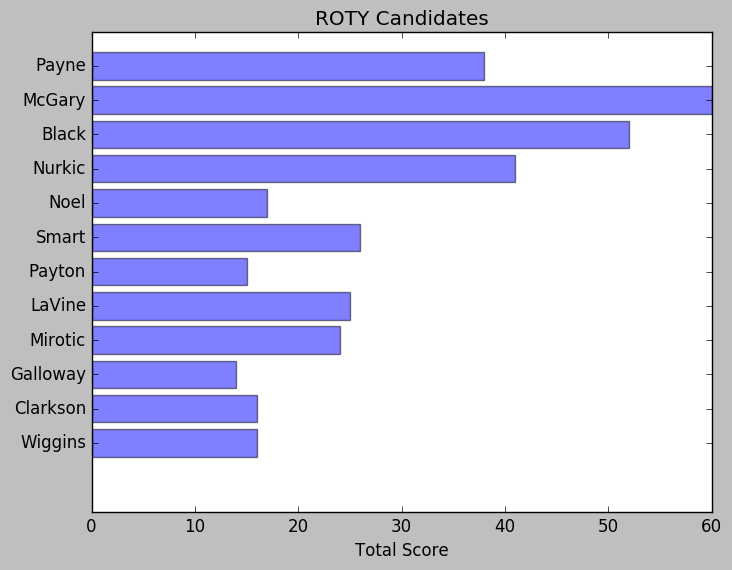

In [893]:
# Get each candidate's ranking in points, assists, and rebounds and add it all up 
c1 = pointsR.Name[pointsR.Name == 'Andrew Wiggins'].index.tolist()
c1 = c1 + assistsR.Name[assistsR.Name == 'Andrew Wiggins'].index.tolist()
c1 = c1 + reboundsR.Name[reboundsR.Name == 'Andrew Wiggins'].index.tolist()

c2 = pointsR.Name[pointsR.Name == 'Jordan Clarkson'].index.tolist()
c2 = c2 + assistsR.Name[assistsR.Name == 'Jordan Clarkson'].index.tolist()
c2 = c2 + reboundsR.Name[reboundsR.Name == 'Jordan Clarkson'].index.tolist()

c3 = pointsR.Name[pointsR.Name == 'Langston Galloway'].index.tolist()
c3 = c3 + assistsR.Name[assistsR.Name == 'Langston Galloway'].index.tolist()
c3 = c3 + reboundsR.Name[reboundsR.Name == 'Langston Galloway'].index.tolist()

c4 = pointsR.Name[pointsR.Name == 'Nikola Mirotic'].index.tolist()
c4 = c4 + assistsR.Name[assistsR.Name == 'Nikola Mirotic'].index.tolist()
c4 = c4 + reboundsR.Name[reboundsR.Name == 'Nikola Mirotic'].index.tolist()

c5 = pointsR.Name[pointsR.Name == 'Zach LaVine'].index.tolist()
c5 = c5 + assistsR.Name[assistsR.Name == 'Zach LaVine'].index.tolist()
c5 = c5 + reboundsR.Name[reboundsR.Name == 'Zach LaVine'].index.tolist()

c6 = pointsR.Name[pointsR.Name == 'Elfrid Payton'].index.tolist()
c6 = c6 + assistsR.Name[assistsR.Name == 'Elfrid Payton'].index.tolist()
c6 = c6 + reboundsR.Name[reboundsR.Name == 'Elfrid Payton'].index.tolist()

c7 = pointsR.Name[pointsR.Name == 'Marcus Smart'].index.tolist()
c7 = c7 + assistsR.Name[assistsR.Name == 'Marcus Smart'].index.tolist()
c7 = c7 + reboundsR.Name[reboundsR.Name == 'Marcus Smart'].index.tolist()

c8 = pointsR.Name[pointsR.Name == 'Nerlens Noel'].index.tolist()
c8 = c8 + assistsR.Name[assistsR.Name == 'Nerlens Noel'].index.tolist()
c8 = c8 + reboundsR.Name[reboundsR.Name == 'Nerlens Noel'].index.tolist()

c9 = pointsR.Name[pointsR.Name == 'Jusuf Nurkic'].index.tolist()
c9 = c9 + assistsR.Name[assistsR.Name == 'Jusuf Nurkic'].index.tolist()
c9 = c9 + reboundsR.Name[reboundsR.Name == 'Jusuf Nurkic'].index.tolist()

c10 = pointsR.Name[pointsR.Name == 'Tarik Black'].index.tolist()
c10 = c10 + assistsR.Name[assistsR.Name == 'Tarik Black'].index.tolist()
c10 = c10 + reboundsR.Name[reboundsR.Name == 'Tarik Black'].index.tolist()

c11 = pointsR.Name[pointsR.Name == 'Mitch McGary'].index.tolist()
c11 = c11 + assistsR.Name[assistsR.Name == 'Mitch McGary'].index.tolist()
c11 = c11 + reboundsR.Name[reboundsR.Name == 'Mitch McGary'].index.tolist()

c12 = pointsR.Name[pointsR.Name == 'Adreian Payne'].index.tolist()
c12 = c12 + assistsR.Name[assistsR.Name == 'Adreian Payne'].index.tolist()
c12 = c12 + reboundsR.Name[reboundsR.Name == 'Adreian Payne'].index.tolist()



totalScore = []
for i in range(12):
    totalScore.append(0)
for i in range(0, 3):
    totalScore[0] = totalScore[0] + c1[i]
    totalScore[1] = totalScore[1] + c2[i]
    totalScore[2] = totalScore[2] + c3[i]
    totalScore[3] = totalScore[3] + c4[i]
    totalScore[4] = totalScore[4] + c5[i]
    totalScore[5] = totalScore[5] + c6[i]
    totalScore[6] = totalScore[6] + c7[i]
    totalScore[7] = totalScore[7] + c8[i]
    totalScore[8] = totalScore[8] + c9[i]
    totalScore[9] = totalScore[9] + c10[i]
    totalScore[10] = totalScore[10] + c11[i]
    totalScore[11] = totalScore[11] + c12[i]

# Graph the total score of each candidate. Candidate with the smallest score is the ROTY    
rookies = ('Wiggins', 'Clarkson', 'Galloway', 'Mirotic', 'LaVine', 'Payton', 'Smart', 'Noel', 'Nurkic', 'Black', 'McGary', 'Payne')
y_pos = np.arange(len(rookies))
 
plt.barh(y_pos, totalScore, align='center', alpha=0.5)
plt.yticks(y_pos, rookies)
plt.xlabel('Total Score')
plt.title('ROTY Candidates')
 
plt.show()

The bar graph above visually represents the total score that was determined based off of player's rank in points, rebounds, and assists per game. The prediction of Langston Galloway, who is in the top five for points and assists, is confirmed by looking at the graph. This appears to be a highly contested race for rookie of the year because Jordan Clarkson, Andrew Wiggins, and Elfrid Payton are all within a small ditance away. 

The actual winner of the award was the first overall draft pick Andrew Wiggins. The official decision is voted on by a panel of officials who take many factors into consideration. Further reading on how Andrew Wiggins was selected the winner of this awawrd can be found at http://www.nba.com/2015/news/04/30/kia-nba-rookie-of-the-year-2014-15-official-release/ . 



<a id='Summary'></a>
## Summary and References
This tutorial highlights statistical relations between candidates and award winners by analyzing tables and bar graphs in Python. More detail about the libraries and debate surrounding end-of-season awards are made available from the following links:
1. Matplot: https://matplotlib.org/api/pyplot_api.html
2. Pandas: http://pandas.pydata.org/pandas-docs/stable/
3. ESPN First Take MVP Debate: https://www.youtube.com/watch?v=nJ9rWZCPNys
4. 2014-2015 Season Data: https://www.kaggle.com/drgilermo/nba-players-stats-20142015 ,
                          http://www.basketball-reference.com/leagues/NBA_2015_totals.html
5. 2017 MVP Race: http://bleacherreport.com/articles/2703290-metrics-101-whos-the-nba-mvp ,
                  http://ftw.usatoday.com/2015/04/russell-westbrook-thunder-mvp-race-usage-rate
6. 2014-2015 Defensive Player of the Year: http://www.nba.com/2015/news/04/23/kawhi-leonard-2014-15-kia-defensive-player-of-the-year-official-release/ 
7. 2014-2015 Rookie of the Year: http://www.nba.com/2015/news/04/30/kia-nba-rookie-of-the-year-2014-15-official-release/ 